In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df_trainset_values = 'data/trainset_values.csv'
df_trainset_labels = 'data/trainset_labels.csv'

In [6]:
df_X = pd.read_csv(df_trainset_values)
df_y = pd.read_csv(df_trainset_labels)

print(df_X.shape)
print(df_y.shape)

(59400, 40)
(59400, 2)


In [111]:
df_X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,"6,000.00",2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### Overview

##### Tanzania is a vast east African country with a geographically dispersed population.  It is known for agricultural, mining, fishing, and tourism (Africa's tallest mountain Kilimanjaro) as major economic drivers. In order to support these activities, the Tanzanian Ministry of Water installed water wells in numerous locations.  Tasked with the maintenance and long-term care of these valuable water sources, the Ministry of Water needs help predicting which of the pumps at their water wells will fail in order to allocate repair resources accordingly.

In [92]:
print('The total population serviced by pumps is {:,}'.format(total_pop))
print('Population affected by Non-functional pumps is {:,}'.format(pop_non))
print('Population affected by pumps that need repair is {:,}'.format(pop_needs))

The total population serviced by pumps is 10,686,653
Population affected by Non-functional pumps is 3,880,455
Population affected by pumps that need repair is 755,916


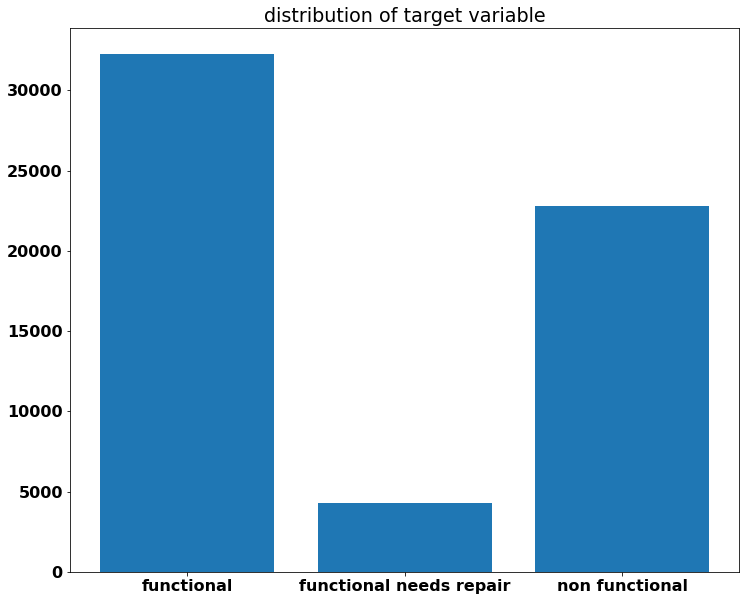

In [98]:
# font = {'family' : 'DejaVu Sans',
#         'weight' : 'bold',
#         'size'   : 16}

# plt.rc('font', **font)


plt.figure(figsize=(12,10))

x=df_y['status_group'].value_counts().sort_index()
plt.bar(x.index,x)
plt.gca().set_xticks([0,1,2])
plt.title('distribution of target variable')
plt.show()

In [38]:
df_merged = df_X.merge(df_y, on='id')

df_merged['status_group'] = df_merged['status_group'].apply(lambda x: x.replace(' ','_'))

non_functional = df_merged[df_merged['status_group'] == 'non_functional'].installer.value_counts(normalize=True).head(3)
functional_needs_repair = df_merged[df_merged['status_group'] == 'functional_needs_repair'].installer.value_counts(normalize=True).head(3)

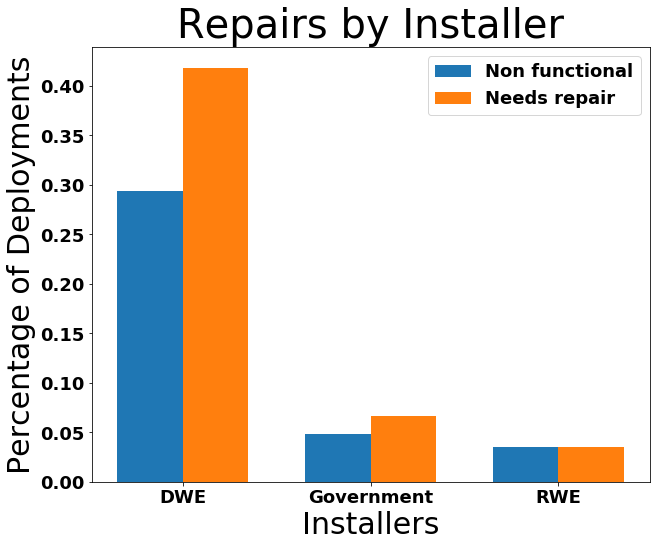

In [74]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

N = 3
plt.figure(figsize=(10,8))
ind = np.arange(N) 
width = 0.35     

xn=non_functional
xr=functional_needs_repair
plt.bar(ind, xn, width, label='Non functional')
plt.bar(ind + width, xr, width, label='Needs repair')
plt.ylabel('Percentage of Deployments', fontsize=30)
plt.title('Repairs by Installer', fontsize=40)
plt.xlabel('Installers', fontsize=30)
plt.xticks(ind + width / 2, (x.index))
plt.legend(loc='best')

plt.show();

In [91]:
total_pop = df_merged.population.sum()
pop_non = df_merged[df_merged['status_group'] == 'non_functional'].population.sum()
pop_needs = df_merged[df_merged['status_group'] == 'functional_needs_repair'].population.sum()

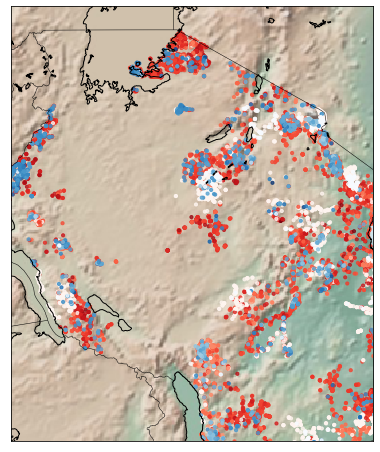

In [158]:
# data for non_operational
lat_non = df_merged[df_merged['status_group'] == 'non_functional'].latitude.values
lon_non = df_merged[df_merged['status_group'] == 'non_functional'].longitude.values
pop_non = df_merged[df_merged['status_group'] == 'non_functional'].population.values

lat_rep = df_merged[df_merged['status_group'] == 'functional_needs_repair'].latitude.values
lon_rep = df_merged[df_merged['status_group'] == 'functional_needs_repair'].longitude.values
pop_rep = df_merged[df_merged['status_group'] == 'functional_needs_repair'].population.values

# map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=-5.81, lon_0=34.38,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawstates(color='black')

# plotting well locations
m.scatter(lon_non, lat_non, latlon=True, c=np.log10(pop_non), s=10,  cmap='Reds', alpha=.8)
m.scatter(lon_rep, lat_rep, latlon=True, c=np.log10(pop_rep), s=10,  cmap='Blues', alpha=.8)


In [140]:
print(sum(lat_non)/len(lat_non))
print(sum(lon_non)/len(lon_non))

-5.810393848538787
34.38100591696608
